# Welcome to bulldozer price prediction

In [1]:
# Importing required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [5]:
bulldozer_df = pd.read_csv('./data/bulldozer-price-dataset/TrainAndValid.csv',low_memory=False)

In [7]:
bulldozer_df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [8]:
#  get imformation about Dataset
bulldozer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [10]:
# checking for null values
bulldozer_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

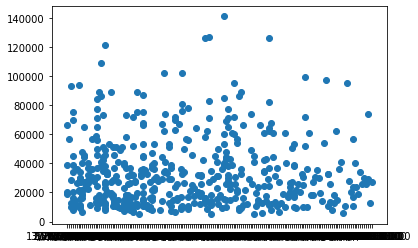

In [13]:

fig ,ax = plt.subplots()
ax.scatter(bulldozer_df["saledate"][:500],bulldozer_df['SalePrice'][:500])

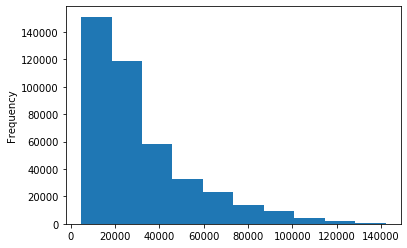

In [14]:
bulldozer_df.SalePrice.plot.hist()

In [18]:
# Again importing dataset 
bulldozer_df = pd.read_csv('./data/bulldozer-price-dataset/TrainAndValid.csv', low_memory=False,parse_dates=['saledate'])

In [19]:
bulldozer_df.saledate.dtype

dtype('<M8[ns]')

In [20]:
bulldozer_df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

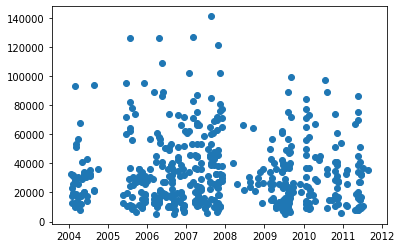

In [21]:

fig ,ax = plt.subplots()
ax.scatter(bulldozer_df["saledate"][:500],bulldozer_df['SalePrice'][:500])

In [22]:
# Sort Dataset by Saledate
bulldozer_df.sort_values(by='saledate',inplace=True,ascending=True)

In [24]:
bulldozer_df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [25]:
df_temp = bulldozer_df.copy()

In [26]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [28]:
df_temp['saleYear'] = df_temp.saledate.dt.year

In [30]:
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day

In [32]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [34]:
df_temp.drop(labels=['saledate'],inplace=True,axis=1)

In [42]:
len(df_temp.state.value_counts())

53

In [45]:
pd.api.types.is_numeric_dtype(df_temp['saleYear'])

True

In [49]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [56]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()
    

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [60]:
df_temp.drop(['label'],inplace=True,axis=1)

In [62]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [66]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [68]:
df_temp.to_csv('./data/bulldozer-price-dataset/bulldozer-dataset-preprocessed.csv',index=False)

## Checkpoint

In [85]:
df_temp = pd.read_csv('./data/bulldozer-price-dataset/bulldozer-dataset-preprocessed.csv',low_memory=False)

In [86]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [87]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label + 'is missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [88]:
df_temp.auctioneerID.isna().sum()

0

In [89]:
df_temp.MachineHoursCurrentMeter.isna().sum()

0

In [90]:
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [91]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_ismissing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes+1

In [92]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 101 entries, SalesID to Steering_Controls_ismissing
dtypes: bool(46), float64(3), int16(4), int64(8), int8(40)
memory usage: 71.6 MB


In [94]:
df_temp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [96]:
df_temp.to_csv('./data/bulldozer-price-dataset/bulldozer-dataset-ready-for-ml.csv',index=True)

## Checkpoint 2

In [3]:
df_temp = pd.read_csv('./data/bulldozer-price-dataset/bulldozer-dataset-ready-for-ml.csv',low_memory=False)

In [4]:
df_temp.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
...,...,...,...,...,...
Backhoe_Mounting_ismissing,False,True,False,True,False
Blade_Type_ismissing,False,True,False,True,False
Travel_Controls_ismissing,False,True,False,True,False
Differential_Type_ismissing,True,False,True,False,True


## Modelling  
### Now our data is ready for modeling
* Choosing right model for our data
* Evaluating the model
* Tunning the hyper parameters for improving our model

In [7]:
%%time
model = RandomForestRegressor(n_jobs=-1,random_state=22)

model.fit(df_temp.drop(['SalePrice'],axis=1),df_temp['SalePrice'])


Wall time: 9min 28s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [8]:
model.score(df_temp.drop(['SalePrice'],axis=1),df_temp['SalePrice'])

0.9878550033775876

In [5]:
# Splitting Data into validation and Training Data
df_val = df_temp[df_temp.saleYear==2012]
df_train = df_temp[df_temp.saleYear!=2012]


In [6]:
len(df_val), len(df_train)

(11573, 401125)

In [7]:
X_train ,Y_train = df_train.drop('SalePrice',axis=1),df_train.SalePrice
X_valid , Y_valid = df_val.drop('SalePrice',axis=1),df_val.SalePrice

In [8]:
%%time
# Create model using RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=22)
model.fit(X_train,Y_train)
model.score(X_valid,Y_valid)

Wall time: 8min 14s


0.8716789484107219

## Evaluating Model
### Using sklearn.metrics

In [14]:
# import 
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [9]:
%%time
# Reducing time to Train our Model
model = RandomForestRegressor(n_jobs=-1,random_state=22,max_samples=10000)
model.fit(X_train,Y_train)
model.score(X_valid,Y_valid)

Wall time: 21.5 s


0.8330731879722348

In [10]:
def model_score(model):
    score={
        "mean_absolute_error":mean_absolute_error(Y_valid,model.predict(_valid)),
        "mean_squared_log_error":mean_squared_log_error(Y_valid,model.predict(X_valid)),
        "r^2_score":r2_score(Y_valid,model.predict(X_valid))
    }
    return score

In [11]:
model_score(model)

{'mean_absolute_error': 7205.789728678821,
 'mean_squared_log_error': 0.08841952935088632,
 'r^2_score': 0.8330731879722348}

### Hyper parameter tunning with RandomizedSearchCV

In [13]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}

In [16]:
%%time

rf_grid = {'n_estimators':np.arange(10,100,10),
          'max_depth':[None,3,5,10],
          'min_samples_leaf':np.arange(1,20,2),
          'min_samples_split':np.arange(2,20,2),
          'max_features':[0.5,1,'sqrt','auto'],
          'max_samples':[10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=22,),
                              param_distributions=rf_grid,
                              n_iter=8,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.9min finished


Wall time: 4min 2s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [17]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [18]:
model_score(rs_model)

{'mean_absolute_error': 7717.155635644894,
 'mean_squared_log_error': 0.09583654641161671,
 'r^2_score': 0.8017721981025475}

In [49]:
model_record

{0.8446823773608995: {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'mse',
  'max_depth': None,
  'max_features': 0.5,
  'max_leaf_nodes': None,
  'max_samples': 20000,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 14,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 35,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 0.8458002242809527: {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'mse',
  'max_depth': None,
  'max_features': 0.5,
  'max_leaf_nodes': None,
  'max_samples': 20000,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 14,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 40,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 0.8477846673810971: {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'mse',
  'max_depth': No

In [54]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=10,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=100000,
                                   random_state=22)
ideal_model.fit(X_train,Y_train)
ideal_model.score(X_valid,Y_valid)

Wall time: 38.9 s


0.8768099706671829

In [55]:
model_score(ideal_model)

{'mean_absolute_error': 6146.841097561851,
 'mean_squared_log_error': 0.06574160206584698,
 'r^2_score': 0.8768099706671829}

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Columns: 101 entries, Unnamed: 0 to Steering_Controls_ismissing
dtypes: bool(46), float64(2), int64(53)
memory usage: 189.0 MB


## Test And Make Prediction on Test Data set


In [83]:
# import our Test dataset
test_df = pd.read_csv('./data/bulldozer-price-dataset/Test.csv',parse_dates=['saledate'],low_memory=False)
test_df.head()
#len(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [79]:
test_df.saledate.dtype

dtype('<M8[ns]')

In [76]:
def process_data(test_df):
    test_df['saleYear'] = test_df.saledate.dt.year

    test_df['saleMonth'] = test_df.saledate.dt.month

    test_df['saleDay'] = test_df.saledate.dt.day
    test_df.drop("saledate",inplace=True,axis=1)
  
    for label,content in test_df.items():
        if pd.api.types.is_string_dtype(content):
            test_df[label] = content.astype('category').cat.as_ordered()
    for label,content in test_df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                test_df[label + 'is missing'] = pd.isnull(content)
                test_df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            test_df[label+"_ismissing"] = pd.isnull(content)
            test_df[label] = pd.Categorical(content).codes+1
    return test_df                    

In [84]:
test_df = process_data(test_df)
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_ismissing,Stick_Length_ismissing,Thumb_ismissing,Pattern_Changer_ismissing,Grouser_Type_ismissing,Backhoe_Mounting_ismissing,Blade_Type_ismissing,Travel_Controls_ismissing,Differential_Type_ismissing,Steering_Controls_ismissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 99 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           12457 non-null  int8   
 8   fiModelDesc                         12457 non-null  int16  
 9   fiBaseModel                         12457 non-null  int16  
 10  fiSecondaryDesc                     12457 non-null  int8   
 11  fiModelSeries                       12457